# Predictive Analytics Employees' Burnout

# 1. Data Loading

## 1.1. Kaggle Credentials

Kaggle Username dan Kaggle Key diperlukan untuk mengakses dataset pada Kaggle. Kedua variabel tersebut kemudian disimpan dalam environment variable dengan bantuan library `os`.

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = '<username>'
os.environ['KAGGLE_KEY'] = '<key>'

## 1.2. Download the Dataset

Dataset yang digunakan adalah [Are Your Employees Burning Out?](https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out) dengan `train.csv` sebagai dataset training dan validation.

In [2]:
# Download train.csv ke local directory
!kaggle datasets download -d blurredmachine/are-your-employees-burning-out -f train.csv -p .

100%|████████████████████████████████████████| 289k/289k [00:00<00:00, 1.07MB/s]
100%|████████████████████████████████████████| 289k/289k [00:00<00:00, 1.06MB/s]


In [3]:
# Extract file
!unzip -qo train.csv.zip && rm train.csv.zip

# 2. Data Understanding

Import library yang diperlukan.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.1. Menampilkan Data

In [5]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


Menghapus kolom `Employee ID` karena tidak diperlukan.

In [6]:
train_df.drop(['Employee ID'], axis=1, inplace=True)

## 2.2. Exploratory Data Analysis

Di sini akan dilakukan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### 2.2.1. Deskripsi Variabel

Pengecekan informasi variabel dari dataset berupa jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


File ini terdiri dari 9 kolom sebagai berikut:

- Employee ID (telah dihapus): ID unik yang dialokasikan untuk setiap karyawan (contoh: fffe390032003000)
- Date of Joining: Tanggal-waktu ketika karyawan telah bergabung dengan organisasi (contoh: 2008-12-30)
- Gender: Jenis kelamin karyawan (Pria/Wanita)
- Company Type: Jenis perusahaan tempat karyawan bekerja (Layanan/Produk)
- WFH Setup Available: Apakah fasilitas bekerja dari rumah tersedia untuk karyawan (Ya/Tidak)
- Designation: Penunjukan karyawan yang bekerja di organisasi.
  - Di kisaran [0.0, 5.0] lebih besar adalah penunjukan yang lebih tinggi.
- Resource Allocation: Jumlah sumber daya yang dialokasikan kepada karyawan untuk bekerja, yaitu. jumlah jam kerja.
  - Dalam kisaran [1.0, 10.0] (lebih tinggi berarti lebih banyak sumber daya)
- Mental Fatigue Score: Tingkat kelelahan mental yang dihadapi karyawan.
  - Dalam rentang [0.0, 10.0] dimana 0.0 berarti tidak ada kelelahan dan 10.0 berarti kelelahan total.
- Burn Rate: Nilai yang perlu kita prediksi untuk setiap karyawan yang memberitahukan tingkat Burn out saat bekerja.
  - Pada rentang [0.0, 1.0] dimana semakin tinggi nilainya maka semakin banyak terjadi burn out.

### 2.2.2. Deskripsi Statistik

Melakukan pengecekan deskripsi statistik data dengan fitur describe().

In [8]:
train_df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


Berdasarkan output diatas, didapatkan deskripsi statistik yaitu:
1. count: Jumlah sampel data
2. mean: Nilai rata-rata
3. std: Standar deviasi
4. min: Nilai minimum
5. 25%: Kuartil bawah/Q1
6. 50%: Kuartil tengah/Q2/median
7. 75%: Kuartil atas/Q3
8. max: Nilai maksimum

### 2.2.3. Menangani Missing Value

Menemukan nilai yang hilang pada dataset.

In [9]:
train_df.isnull().sum()

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

Menghapus baris yang memiliki missing value.

In [10]:
train_df.dropna(inplace=True)

# Detail setelah dilakukan penghapusan data yang kosong
train_df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18590.000000,18590.000000,18590.000000,18590.000000
mean,2.179398,4.486552,5.732173,0.452444
std,1.133148,2.044848,1.920547,0.197848
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.320000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


### 2.2.4. Menangani Outliers

Menemukan outlier pada dataset.

<AxesSubplot: xlabel='Burn Rate'>

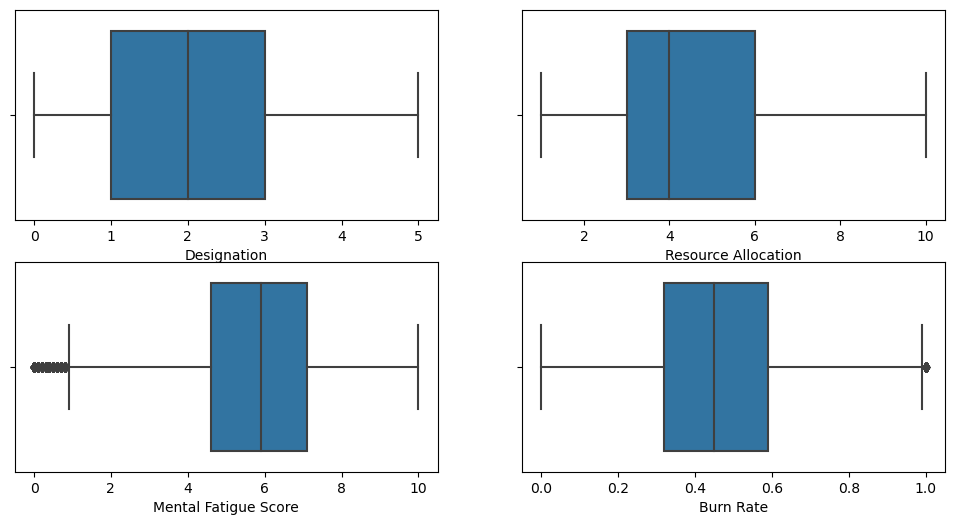

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

sns.boxplot(ax=ax[0, 0], x=train_df['Designation'])
sns.boxplot(ax=ax[0, 1], x=train_df['Resource Allocation'])
sns.boxplot(ax=ax[1, 0], x=train_df['Mental Fatigue Score'])
sns.boxplot(ax=ax[1, 1], x=train_df['Burn Rate'])


Berdasarkan boxplot diatas, didapatkan outliers pada variabel `Mental Fatigue Score` dan `Burn Rate`.

Buat batas bawah dengan rumus `Q1 - 1.5 * IQR` dan batas atas dengan rumus `Q3 + 1.5 * IQR` dengan `IQR = Q3 - Q1`.

In [12]:
Q1 = train_df.quantile(0.25, numeric_only=True)
Q3 = train_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

left1, right1 = train_df.align(Q1 - 1.5 * IQR, axis=1, copy=False)
left2, right2 = train_df.align(Q3 + 1.5 * IQR, axis=1, copy=False)
left, right = (left1 < right1).align((left2 > right2), axis=1, copy=False)
train_df = train_df[~(left | right).any(axis=1)]

# Detail setelah dilakukan penghapusan data outlier
train_df.describe()



,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18215.000000,18215.000000,18215.000000,18215.000000
mean,2.202031,4.526434,5.811386,0.458032
std,1.109729,1.997432,1.785322,0.188416
min,0.000000,1.000000,0.900000,0.000000
25%,1.000000,3.000000,4.600000,0.320000
50%,2.000000,4.000000,5.900000,0.460000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,0.990000


Hasil setelah dihilangkan outliersnya dan mengatur batas bawah dan batas atasnya.

<AxesSubplot: xlabel='Burn Rate'>

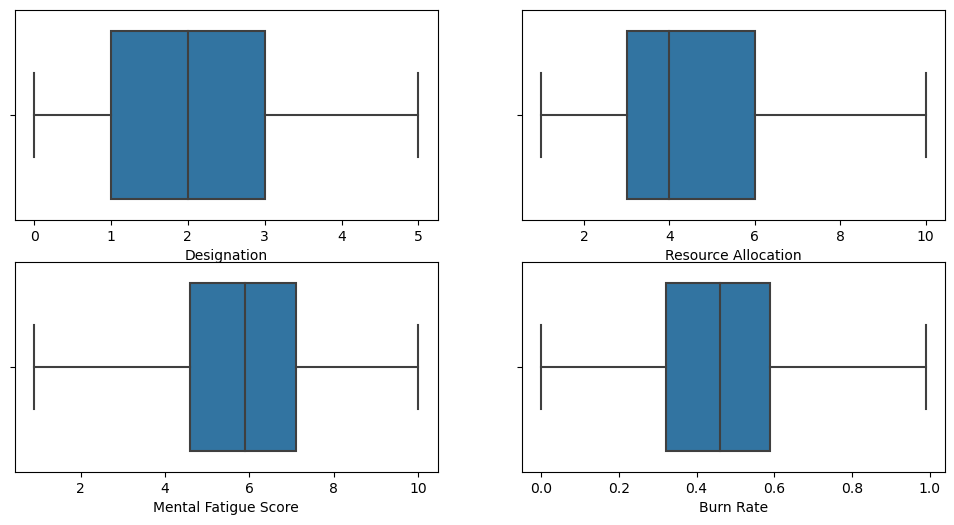

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

sns.boxplot(ax=ax[0, 0], x=train_df['Designation'])
sns.boxplot(ax=ax[0, 1], x=train_df['Resource Allocation'])
sns.boxplot(ax=ax[1, 0], x=train_df['Mental Fatigue Score'])
sns.boxplot(ax=ax[1, 1], x=train_df['Burn Rate'])


### 2.2.5. Univariate Analysis

##### Feature Engineering

Sebelum membagi fitur menjadi fitur numerik dan fitur kategorik, dilakukan feature engineering terlebih dahulu. Ini dilakukan untuk mengubah fitur `Date of Joining` menjadi fitur `Days Employed` dan menjadikannya sebagai fitur numerik.

In [14]:
# Cast "Date of Joining" ke datetime
train_df['Date of Joining'] = pd.to_datetime(train_df['Date of Joining'])

In [15]:
# Dapatkan "Date of Joining" terbaru
max_date = train_df['Date of Joining'].max()

# Buat variabel last_date yang merupakan max_date ditambah 1 hari
last_date = max_date + pd.DateOffset(days=1)

Kita dapat mengasumsikan bahwa semakin banyak hari yang dimiliki seseorang, maka semakin berpengalaman dia.

In [16]:
# Buat kolom "Days Employed"
days_employed = last_date - train_df.loc[:, 'Date of Joining']
days_employed = days_employed.dt.days

# Replace 'Date of Joining' dengan 'Days Employed'

# Buat list nama dengan 'Days Employed' di-insert pada posisi yang tepat
column_names = train_df.columns.tolist()
column_names.insert(column_names.index('Date of Joining'), 'Days Employed')
train_df['Days Employed'] = days_employed

# Reorder kolom di DataFrame
train_df = train_df.reindex(columns=column_names)

# Drop kolom 'Date of Joining'
train_df.drop(['Date of Joining'], axis=1, inplace=True)

In [17]:
# Menampilkan data yang sudah diubah
train_df.head()

,Days Employed,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,93,Female,Service,No,2.0,3.0,3.8,0.16
1,32,Male,Service,Yes,1.0,2.0,5.0,0.36
3,59,Male,Service,Yes,1.0,1.0,2.6,0.20
4,161,Female,Service,No,3.0,7.0,6.9,0.52
5,36,Male,Product,Yes,2.0,4.0,3.6,0.29


Membagi fitur pada dataset menjadi dua bagian, yakni numerical features dan categorical features.

In [18]:
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
print('Numerical columns: ', num_cols)
print('Categorical columns: ', cat_cols)

num_features = num_cols.copy()
cat_features = cat_cols.copy()


num_features.remove('Burn Rate')


Numerical columns:  ['Days Employed', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
Categorical columns:  ['Gender', 'Company Type', 'WFH Setup Available']


#### a. Categorical Features

Menghitung jumlah dan persentase karyawan berdasarkan jenis kelamin, jenis perusahaan, fasilitas bekerja dari rumah, dan penunjukan.

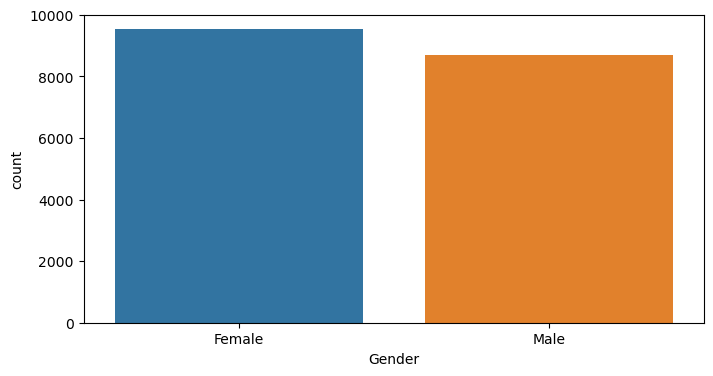

        count  percentage
Female   9525       52.29
Male     8690       47.71



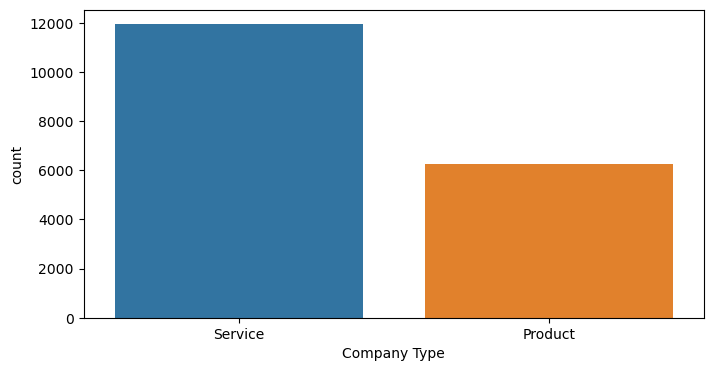

         count  percentage
Service  11939       65.54
Product   6276       34.46



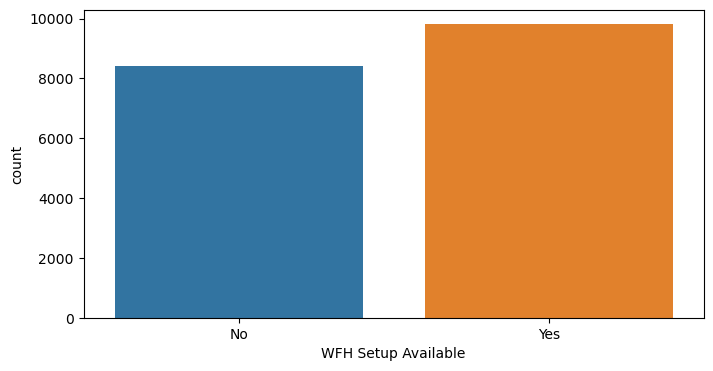

     count  percentage
Yes   9809       53.85
No    8406       46.15



In [19]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train_df)
    plt.show()
    count = train_df[col].value_counts()
    percentage = train_df[col].value_counts(normalize=True) * 100
    df = pd.DataFrame({'count': count, 'percentage': percentage.round(2)})
    print(df)
    print()

#### b. Numerical Features

Menampilkan distribusi data pada fitur numerik.

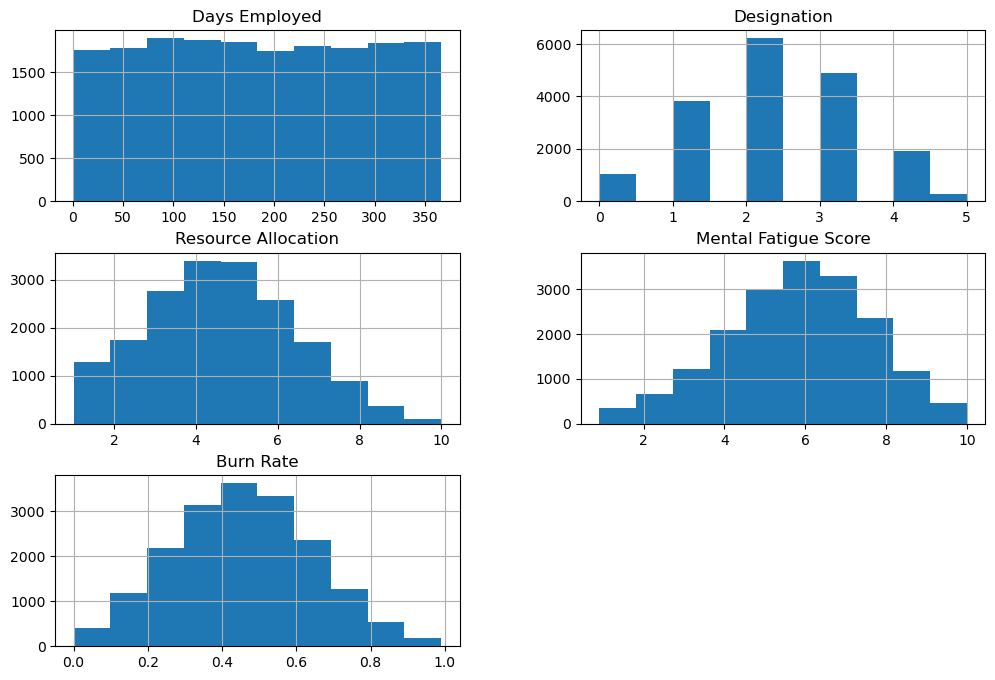

In [20]:
train_df.hist(figsize=(12, 8))
plt.show()

Berdasarkan grafik histogram di atas, didapatkan distribusi data pada fitur numerik yaitu:
- `Designation`: Distribusi data normal.
- `Resource Allocation`: Distribusi data normal.
- `Mental Fatigue Score`: Distribusi data normal.
- `Burn Rate`: Distribusi data normal.
- `Days Employed`: Distribusi data Ragged Plateau.

### 2.2.6. Multivariate Analysis

#### a. Categorical Features

Mengecek rata-rata `Burn Rate` terhadap masing-masing fitur kategori yaitu `Gender`, `Company Type`, dan `WFH Setup Available` untuk mengetahui pengaruh fitur tersebut terhadap `Burn Rate`.


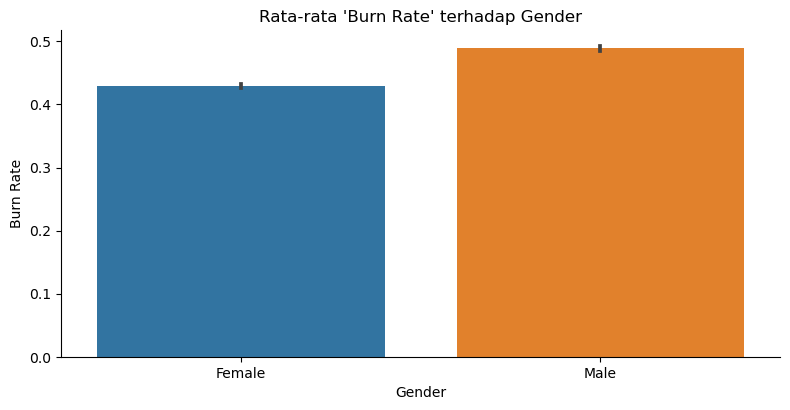

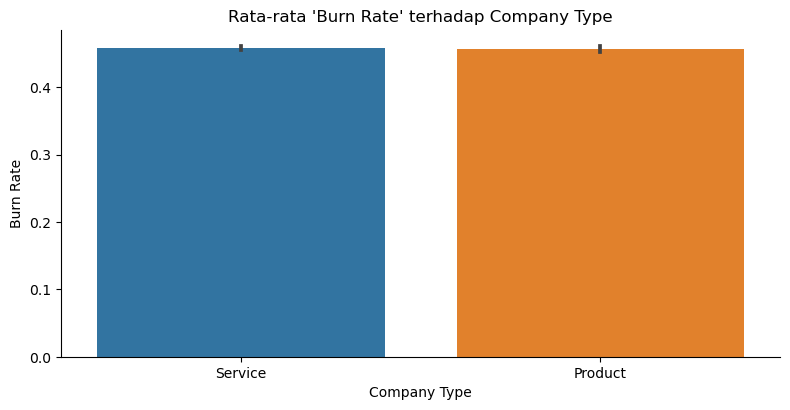

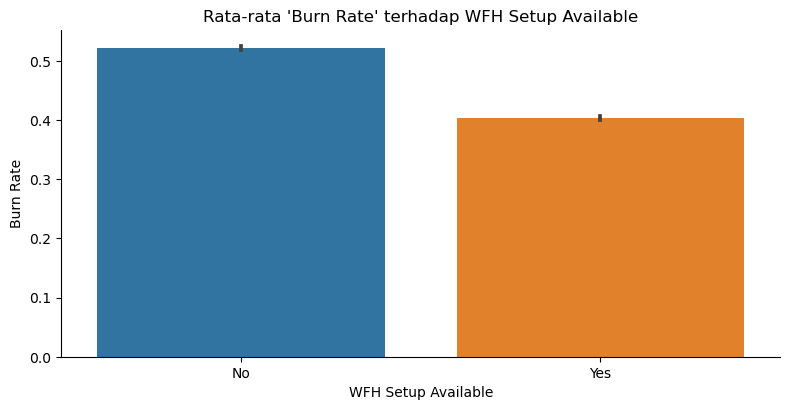

In [21]:
for col in cat_cols:
  sns.catplot(x=col, y='Burn Rate', data=train_df, kind='bar', height=4, aspect=2)
  plt.title(f'Rata-rata \'Burn Rate\' terhadap {col}')

Berdasarkan histogram di atas, diperoleh kesimpulan:
- Rata-rata `Burn Rate` terhadap `Gender` memberikan sedikit pengaruh di mana rata-rata `Burn Rate` untuk `Gender` `Male` lebih tinggi dibandingkan `Gender` `Female`.
- `Company Type` tidak memberikan pengaruh terhadap `Burn Rate` karena rata-rata `Burn Rate` untuk `Company Type` `Service` dan `Product` hampir sama.
- Ketidaktersediaan WFH (Work From Home) membuat `Burn Rate` lebih tinggi  dibandingkan yang tersedia.

Menghapus fitur `Gender` karena tidak memiliki korelasi terhadap `Burn Rate`.

In [22]:
train_df.drop('Gender', axis=1, inplace=True)
cat_features.remove('Gender')

train_df.head()

,Days Employed,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,93,Service,No,2.0,3.0,3.8,0.16
1,32,Service,Yes,1.0,2.0,5.0,0.36
3,59,Service,Yes,1.0,1.0,2.6,0.20
4,161,Service,No,3.0,7.0,6.9,0.52
5,36,Product,Yes,2.0,4.0,3.6,0.29


#### b. Numerical Features

Mengecek rata-rata `Burn Rate` terhadap masing-masing fitur numerik, yakni `Designation`, `Resource Allocation`, `Mental Fatigue Score`, `Burn Rate`, dan `Days Employed`.

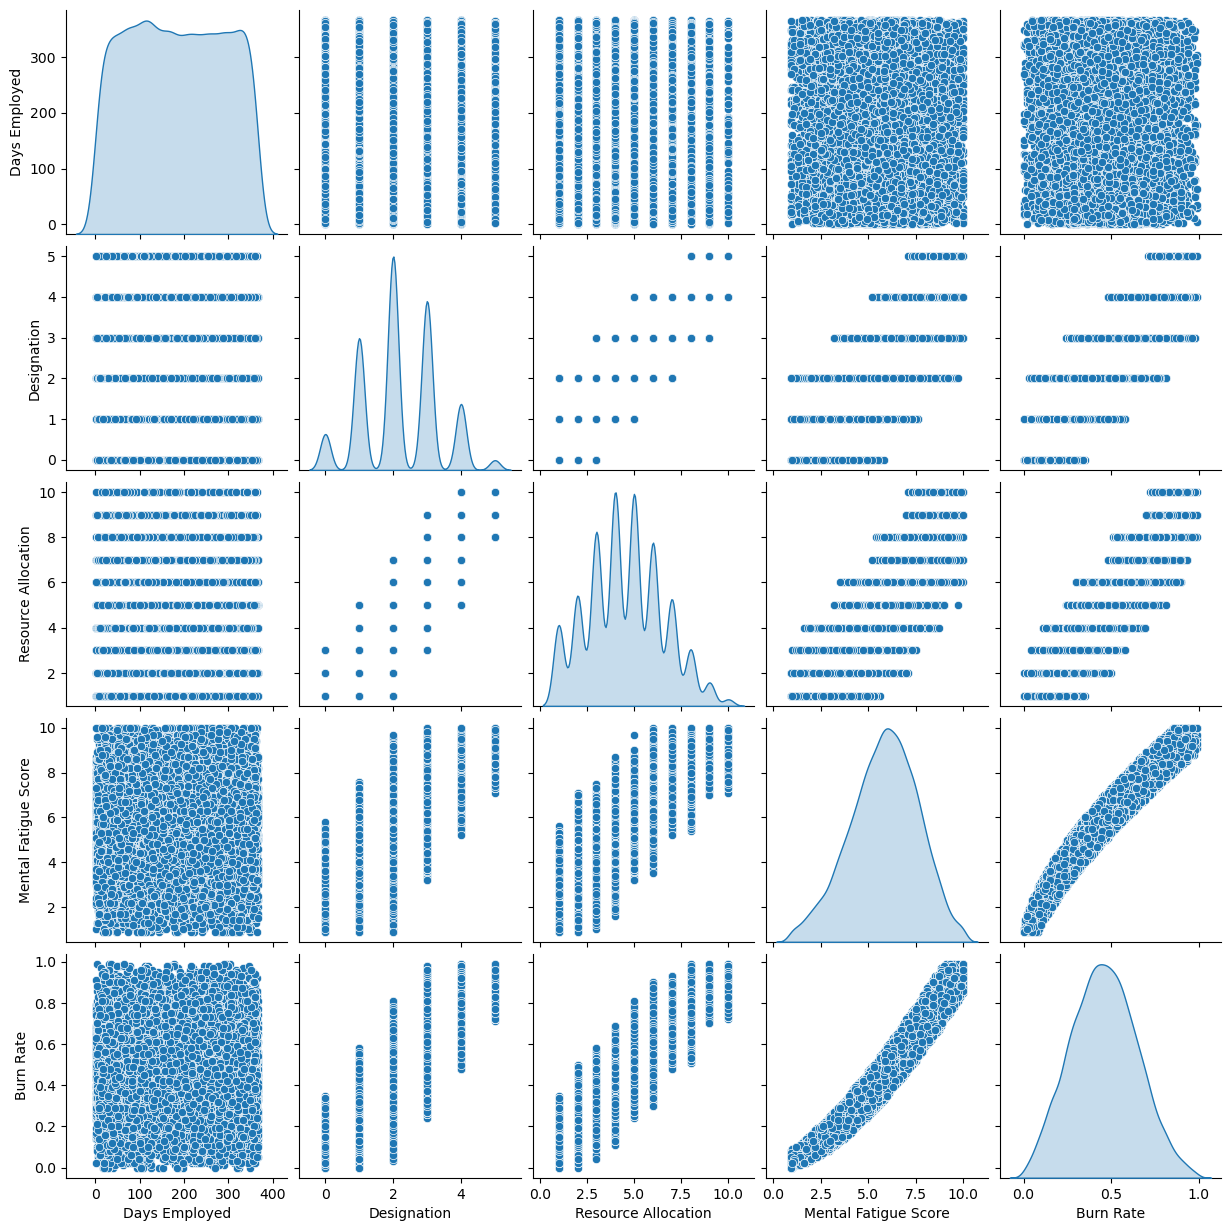

In [23]:
sns.pairplot(train_df, diag_kind='kde')

Berdasarkan diagram di atas, dapat disimpulkan:
- Fitur `Burn Rate` memiliki pola sebaran data dengan korelasi positif terhadap `Designation`, `Resource Allocation`, dan `Mental Fatigue Score`.
- Fitur `Burn Rate` memiliki pola sebaran data yang tidak beraturan terhadap `Days Employed`, sehingga tidak memiliki korelasi.

### 2.2.7. Correlation Matrix

Pengecekan korelasi atau hubungan antar fitur numerik menggunakan heatmap correlation matrix.

Text(0.5, 1.0, 'Correlation Matrix Fitur Numerik')

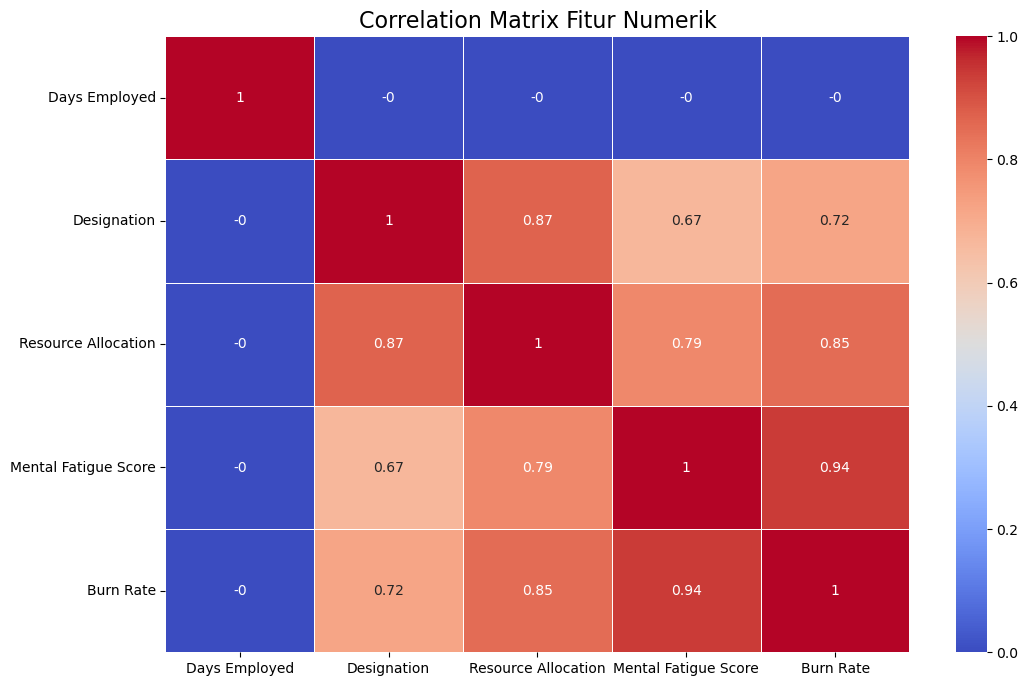

In [24]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr(numeric_only=True).round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Fitur Numerik', size=16)

Berdasarkan diagram heatmap di atas, dapat disimpulkan bahwa:
- Rentang nilai adalah 0 sampai 1.
- Semakin mendekati 1, semakin kuat positif korelasi antar variabel.
- Semakin mendekati 0, semakin rendah atau tidak ada korelasi antar variabel.
- Semakin mendekati -1, semakin kuat negatif korelasi antar variabel.
- Korelasi antar fitur numerik yang memiliki korelasi kuat positif adalah `Burn Rate` terhadap `Designation`, `Resource Allocation`, dan `Mental Fatigue Score`.
- Korelasi antar fitur numerik yang tidak memiliki korelasi adalah `Burn Rate` terhadap `Days Employed`.

Menghapus fitur `Days Employed` karena tidak memiliki korelasi terhadap `Burn Rate`.

In [25]:
train_df.drop('Days Employed', axis=1, inplace=True)
num_features.remove('Days Employed')

train_df.head()

,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Service,No,2.0,3.0,3.8,0.16
1,Service,Yes,1.0,2.0,5.0,0.36
3,Service,Yes,1.0,1.0,2.6,0.20
4,Service,No,3.0,7.0,6.9,0.52
5,Product,Yes,2.0,4.0,3.6,0.29


# **3. Data Preparation**

## 3.1. Encoding Fitur Kategori

Melakukan proses encoding pada fitur kategori `Gender`, `Company Type`, dan `WFH Setup Available`.

In [26]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Company Type'], prefix='Company Type')], axis=1)
train_df = pd.concat([train_df, pd.get_dummies(train_df['WFH Setup Available'], prefix='WFH Setup Available')], axis=1)
train_df.drop(['Company Type', 'WFH Setup Available'], axis=1, inplace=True)
train_df.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes
0,2.0,3.0,3.8,0.16,0,1,1,0
1,1.0,2.0,5.0,0.36,0,1,0,1
3,1.0,1.0,2.6,0.20,0,1,0,1
4,3.0,7.0,6.9,0.52,0,1,1,0
5,2.0,4.0,3.6,0.29,1,0,0,1


## 3.2. Dataset Split

Membagi dataset menjadi data latih dan data validasi kemudian menampilkan total dataset, total data latih dan total data validasi.


In [27]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Burn Rate'], axis=1)
y = train_df['Burn Rate']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [28]:
print(f'Total # of sample in whole dataset: {len(X_train) + len(X_val)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in val dataset: {len(X_val)}')

Total # of sample in whole dataset: 18215
Total # of sample in train dataset: 16393
Total # of sample in val dataset: 1822


## 3.3. Standarisasi

Melakukan standarisasi pada fitur numerik yaitu `Designation`, `Resource Allocation`, dan `Mental Fatigue Score` menggunakan StandardScaler untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train.loc[:, num_features])
X_train[num_features].head()

,Designation,Resource Allocation,Mental Fatigue Score
16069,0.717453,1.234325,0.943609
2686,-1.080896,-1.260102,-1.345841
9730,-1.080896,-0.761217,-0.954959
8574,-1.080896,-0.761217,0.217686
15992,0.717453,0.236554,-0.229036


In [30]:
X_train[num_features].describe().round(4)

,Designation,Resource Allocation,Mental Fatigue Score
count,16393.0000,16393.0000,16393.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.9801,-1.7590,-2.7418
25%,-1.0809,-0.7612,-0.6758
50%,-0.1817,-0.2623,0.0502
75%,0.7175,0.7354,0.7202
max,2.5158,2.7310,2.3396


# **4. Model Development**

Mempersiapkan dataframe untuk menganalisis ketiga model yang akan digunakan yaitu Boosting Algorithm, K-Nearest Neighbor (KNN), Random Forest.

In [31]:
models = pd.DataFrame(index=['train_mse', 'val_mse'],
                      columns=['Boosting', 'KKN', 'RandomForest'])

## 4.1. Boosting Algorithm

Algoritma ini didesain untuk meningkatkan kinerja atau keakuratan prediksi dengan menggabungkan beberapa model sederhana yang dianggap lemah dan membentuk suatu model yang kuat dengan cara menggabungkannya.

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(random_state=42, learning_rate=0.05)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_train, boosting.predict(X_train))

## 4.2. Algoritma K-Nearest Neighbor (KNN)

Algoritma KNN menggunakan kesamaan fitur untuk memprediksi nilai dari setiap data baru dengan cara membandingkan jarak satu sampel ke sampel pelatihan lain dan memilih sejumlah K tetangga terdekat (dengan K adalah sebuah angka positif).

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'KKN'] = mean_squared_error(y_train, knn.predict(X_train))

## 4.3. Algoritma Random Forest

Algoritma random forest dibangun secara acak dan dianggap sebagai "ensemble learner" yang kuat untuk digunakan dalam melakukan klasifikasi dan regresi, dan dapat digunakan untuk menangani data yang tidak seimbang dan memiliki banyak fitur.

In [34]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=12, n_jobs=1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_train, RF.predict(X_train))

# **5. Evaluasi Model**

Melakukan proses scaling fitur numerik pada validation dataset agar skala antara train dataset dan validation dataset sama.

In [35]:
X_val.loc[:, num_features] = scaler.transform(X_val.loc[:, num_features])

Melakukan evaluasi model untuk ketiga algoritma yang digunakan yaitu Boosting Algorithm, K-Nearest Neighbor (KNN), Random Forest menggunakan metrik Mean Squared Error (MSE).

In [36]:
mse = pd.DataFrame(columns=['train', 'val'], index=['Boosting', 'KKN', 'RandomForest'])

model_dict = {'Boosting': boosting, 'KKN': knn, 'RandomForest': RF}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_train, model.predict(X_train))
    mse.loc[name, 'val'] = mean_squared_error(y_val, model.predict(X_val))
    
mse

,train,val
Boosting,0.003867,0.003991
KKN,0.002592,0.003174
RandomForest,0.002355,0.00313


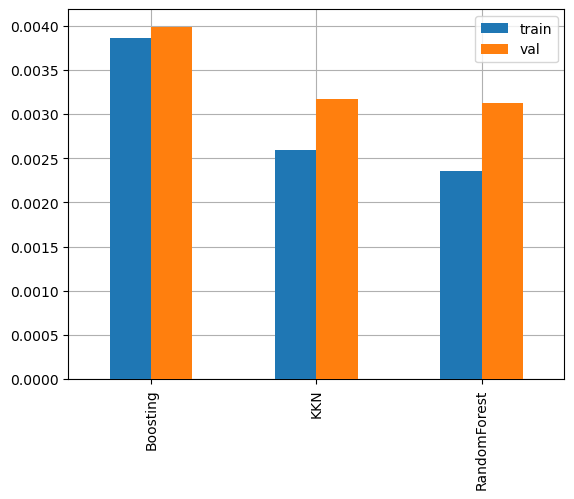

In [37]:
fig, ax = plt.subplots()
mse.sort_values(by='val', ascending=False).plot(kind='bar', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan grafik di atas, dapat disimpulkan bahwa:
- Model Random Forest memiliki nilai MSE terkecil, yaitu 0.002355 pada data latih dan 0.00313 pada data validasi.
- Model K-Nearest Neighbor (KNN) memiliki nilai MSE 0.002592 pada data latih dan 0.003174 pada data validasi.
- Model Boosting Algorithm memiliki nilai MSE terbesar, yaitu 0.003867 pada data latih dan 0.003991 pada data validasi.

Mencoba prediksi `Burn Rate` menggunakan model yang telah dibuat.

In [38]:
prediction = X_val.iloc[:1].copy()
pred_dict = {'y_true': y_val.iloc[:1]}
for name, model in model_dict.items():
    pred_dict[name] = model.predict(prediction).round(2)
    
pd.DataFrame(pred_dict)

,y_true,Boosting,KKN,RandomForest
16752,0.63,0.65,0.65,0.62


Berdasarkan output tabel di atas dapat dilihat bahwa urutan algoritma yang paling mendekati dengan nilai y_true adalah Random Forest. Nilai y_true sebesar 0.63 dan nilai prediksi Random Forest sebesar 0.62.